In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

2D linear convection defined as 

---


$$\frac{\partial u}{\partial t} + c\frac{\partial u}{\partial x} + c\frac{\partial u}{\partial y} = 0$$
Forward difference in time, backward difference in space. Yields the discretised system.
$$u_{ij}^{n+1} = u_{ij}^{n} - c\frac{\Delta t}{\Delta x}(u_{ij}^n - u_{i-1,j}^n) + c\frac{\Delta t}{\Delta y} (u_{ij}^n - u_{i,j-1}^n)$$

In [2]:
nx = 810
ny = 810
nt = 1000
c = 1
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
sigma = .2
dt = sigma * dx

x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)

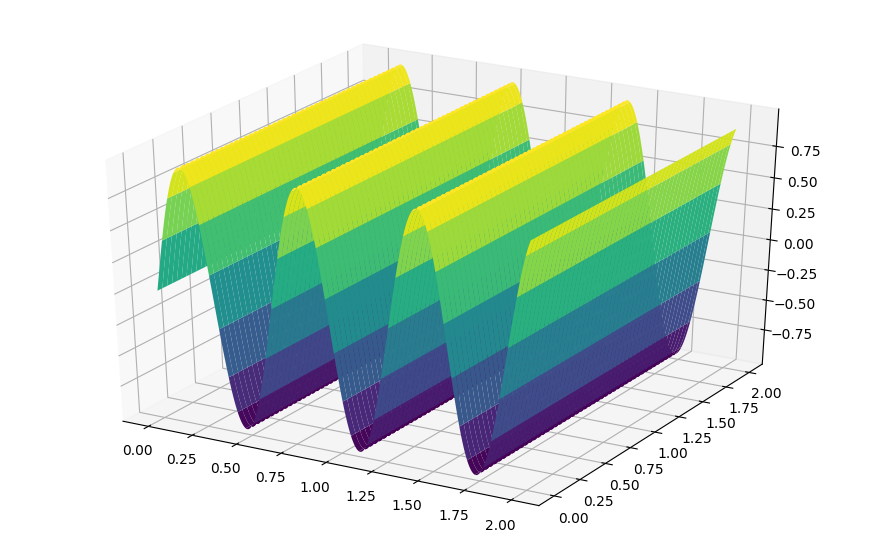

In [3]:
#Initial conditions
u = np.ones((ny,nx))
u[int(.5 / dy):int(1 / dy + 1),int(.5 / dx):int(1 / dx + 1)] = 2
u[:] = np.sin(10*x) 
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')                      
X, Y = np.meshgrid(x, y)                            
surf = ax.plot_surface(X, Y, u[:], cmap=cm.viridis)

In [4]:
U = np.zeros((nt,ny,nx))
U[0] = u

In [5]:
for n in range(0,nt-1):
  un = U[n].copy()
  U[n+1,1:,1:] = (un[1:, 1:] - (0 * dt / dx * (un[1:, 1:] - un[1:, :-1])) -
                              (2*c * dt / dy * (un[1:, 1:] - un[:-1, 1:]))) 
  U[n+1,0,:] = 0
  U[n+1,-1,:] = 0
  U[n+1,:,0] = 0
  U[n+1,:,-1] = 0



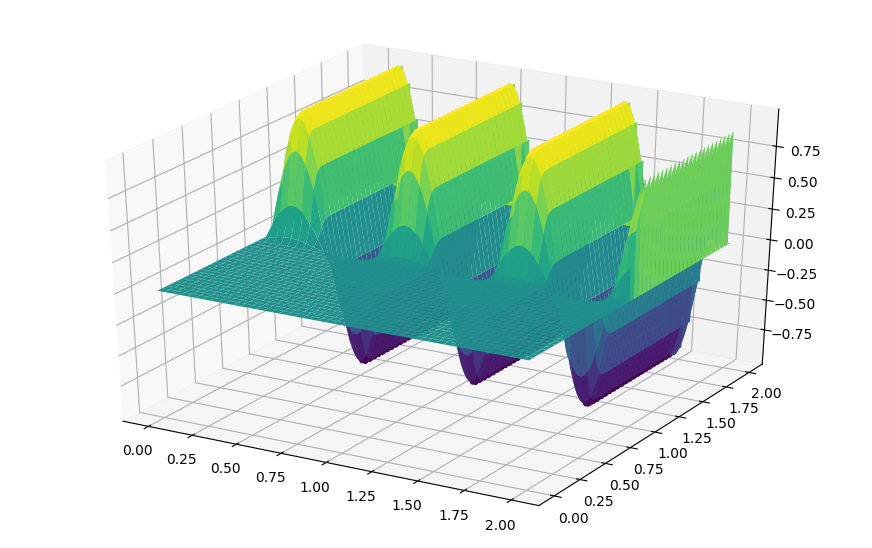

In [6]:
fig = plt.figure(figsize=(11, 7), dpi=100)
ax = fig.gca(projection='3d')
surf2 = ax.plot_surface(X, Y, U[-1], cmap=cm.viridis)

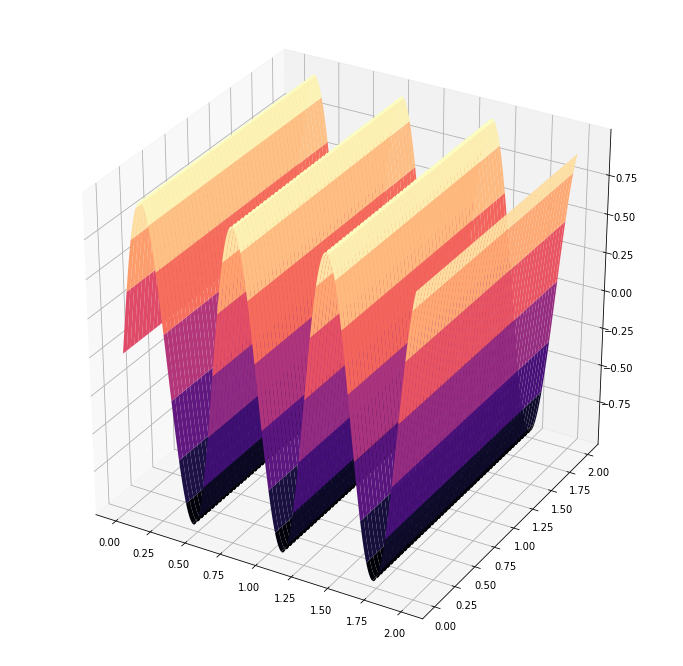

In [ ]:
import matplotlib.animation as animation

fps = 60
frn = 1000
def update_plot(frame_number, zarray, plot):
    plot[0].remove()
    plot[0] = ax.plot_surface(X, Y, zarray[frame_number,:,:], cmap="magma")

fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
plot = [ax.plot_surface(X, Y, U[0,:,:], color='0.75', rstride=1, cstride=1)]
ani = animation.FuncAnimation(fig, update_plot, frn, fargs=(U, plot), interval=1000/fps)


In [ ]:
fn = 'linear_con'
ani.save(fn+'.mp4',writer='ffmpeg',fps=fps)